In [1]:
import matplotlib

# matplotlib.use('nbagg') # uncommen for interactive plots...zoom in etc.. but not working with pytest :(
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['figure.max_open_warning'] = False
%load_ext autoreload
%autoreload 2

from redbaron import redbaron
redbaron.ipython_behavior = False

import numpy as np
from scipy import signal
from pyha import common
from pyha.common.util import plot_freqz
from pyha import simulate, hardware_sims_equal

# add dev folder to path in order to import our module
import os, sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
from pyha_demo_project.complex_fir import ComplexFIR

# in Travis CI we cannot run GATE simulations, comment out to run GATE simulations locally
os.environ["PYHA_SKIP_GATE"] = '1'

# Design filter

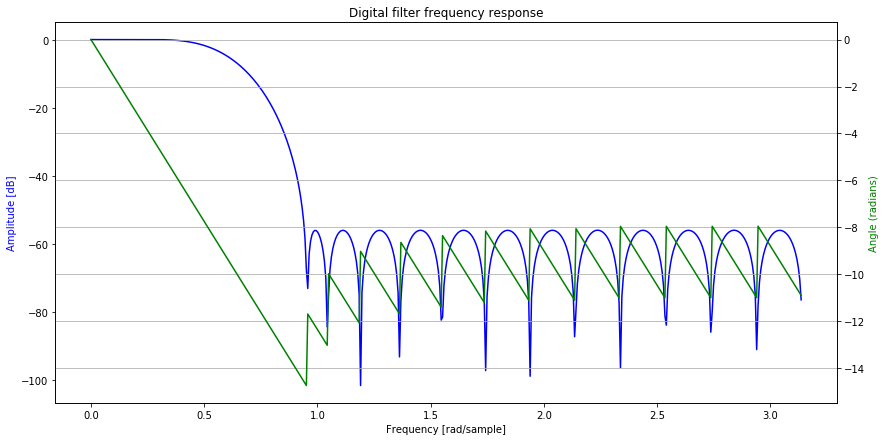

In [2]:
taps = signal.remez(32, [0, 0.05, 0.15, 0.5], [1, 0])
plot_freqz(taps)

# Evaluate frequency and phase response

In [3]:
# get imulse response of the filter
inp = [0.0 + 0.0j] * 512
inp[0] = 1.0 + 1.0j

dut = ComplexFIR(taps)
sims = simulate(dut, inp) # run all simulations
assert hardware_sims_equal(sims)

INFO:pyha.simulation.simulation_interface:Running MODEL simulation!
INFO:pyha.simulation.simulation_interface:Running PYHA simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:pyha.simulation.simulation_interface:Running RTL simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:pyha.simulation.vhdl_simulation:Running COCOTB & GHDL simulation....
INFO:pyha.simulation.simulation_interface:Simulations completed!
INFO:pyha.simulation.simulation_interface:sims_close(rtol=1e-08, atol=1e-08)
INFO:pyha.simulation.simulation_interface:Using "PYHA" as golden output
INFO:pyha.simulation.simulation_interface:PYHA OK!
INFO:pyha.simulation.simulation_interface:RTL OK!


/home/gaspar/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6841: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


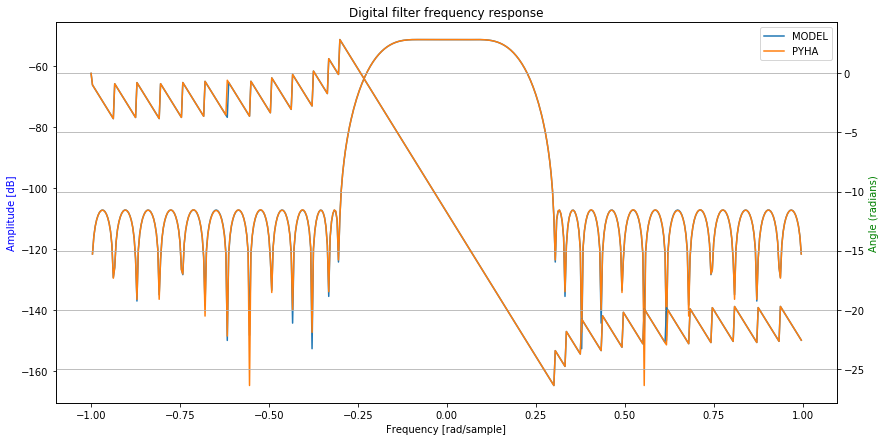

In [4]:
fig, ax1 = plt.subplots(1, 1)
plt.title('Digital filter frequency response')
ax1.magnitude_spectrum(np.array(sims['MODEL']), window=matplotlib.mlab.window_none, scale='dB', label='MODEL')
ax1.magnitude_spectrum(np.array(sims['PYHA']), window=matplotlib.mlab.window_none, scale='dB', label='PYHA')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
ax2.phase_spectrum(np.array(sims['MODEL']), window=matplotlib.mlab.window_none, label='MODEL')
ax2.phase_spectrum(np.array(sims['PYHA']), window=matplotlib.mlab.window_none, label='PYHA')
ax2.set_ylabel('Angle (radians)', color='g')
plt.legend()
plt.grid(True)
plt.show()

# Noise response

In [5]:
np.random.seed(0)  # reproduce tests
inp = np.random.uniform(-1, 1, 1024) + np.random.uniform(-1, 1, 1024)*1j

dut = ComplexFIR(taps)
sims = simulate(dut, inp) # run all simulations
assert hardware_sims_equal(sims)

INFO:pyha.simulation.simulation_interface:Running MODEL simulation!
INFO:pyha.simulation.simulation_interface:Running PYHA simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:pyha.simulation.simulation_interface:Running RTL simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:pyha.simulation.vhdl_simulation:Running COCOTB & GHDL simulation....
INFO:pyha.simulation.simulation_interface:Simulations completed!
INFO:pyha.simulation.simulation_interface:sims_close(rtol=1e-08, atol=1e-08)
INFO:pyha.simulation.simulation_interface:Using "PYHA" as golden output
INFO:pyha.simulation.simulation_interface:PYHA OK!
INFO:pyha.simulation.simulation_interface:RTL OK!


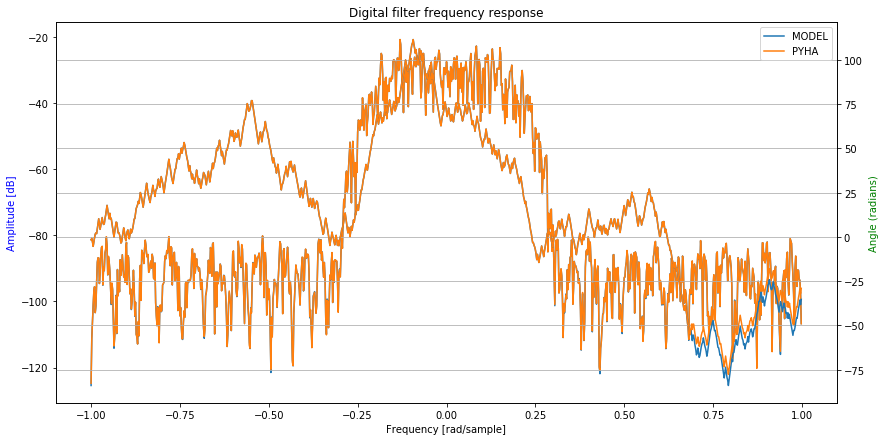

In [6]:
fig, ax1 = plt.subplots(1, 1)
plt.title('Digital filter frequency response')
ax1.magnitude_spectrum(np.array(sims['MODEL']), scale='dB', label='MODEL')
ax1.magnitude_spectrum(np.array(sims['PYHA']), scale='dB', label='PYHA')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
ax2.phase_spectrum(np.array(sims['MODEL']), label='MODEL')
ax2.phase_spectrum(np.array(sims['PYHA']), label='PYHA')
ax2.set_ylabel('Angle (radians)', color='g')
plt.legend()
plt.grid(True)
plt.show()

# Sine response

1024


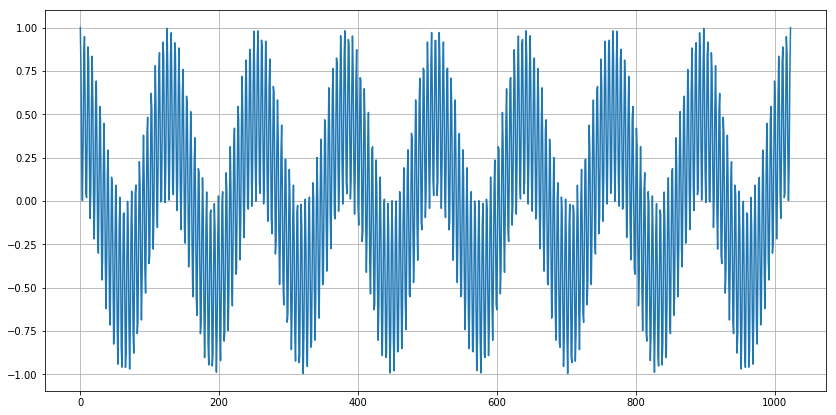

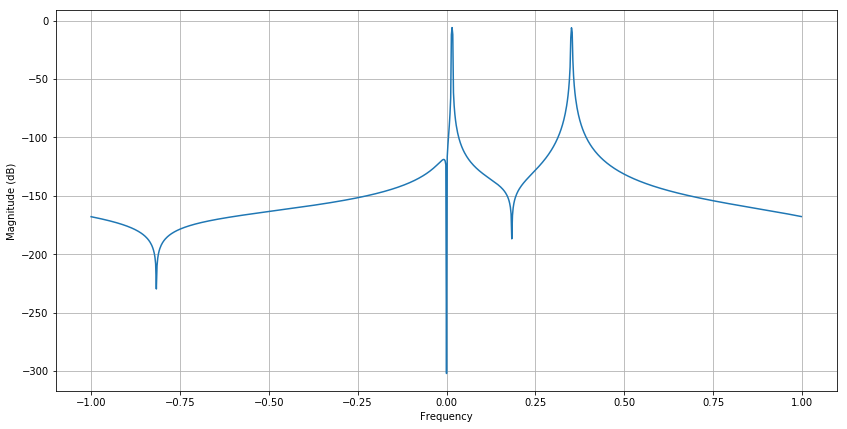

In [7]:
fs = 256
t = np.linspace(0, 4, 4*fs)
print(len(t))
s0 = np.exp(2 * np.pi * 2 * t * 1j)
s1 = np.exp(2 * np.pi * 45 * t * 1j)
inp = s0 + s1
inp *= 0.5

plt.plot(inp.real)
plt.grid(True)
plt.show()

plt.magnitude_spectrum(inp, scale='dB')
plt.grid(True)
plt.show()

In [8]:
dut = ComplexFIR(taps)
sims = simulate(dut, inp) # run all simulations
assert hardware_sims_equal(sims)

INFO:pyha.simulation.simulation_interface:Running MODEL simulation!
INFO:pyha.simulation.simulation_interface:Running PYHA simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:pyha.simulation.simulation_interface:Running RTL simulation!
INFO:pyha.simulation.simulation_interface:Converting complex inputs to ComplexSfix(left=0, right=-17)
INFO:pyha.simulation.vhdl_simulation:Running COCOTB & GHDL simulation....
INFO:pyha.simulation.simulation_interface:Simulations completed!
INFO:pyha.simulation.simulation_interface:sims_close(rtol=1e-08, atol=1e-08)
INFO:pyha.simulation.simulation_interface:Using "PYHA" as golden output
INFO:pyha.simulation.simulation_interface:PYHA OK!
INFO:pyha.simulation.simulation_interface:RTL OK!


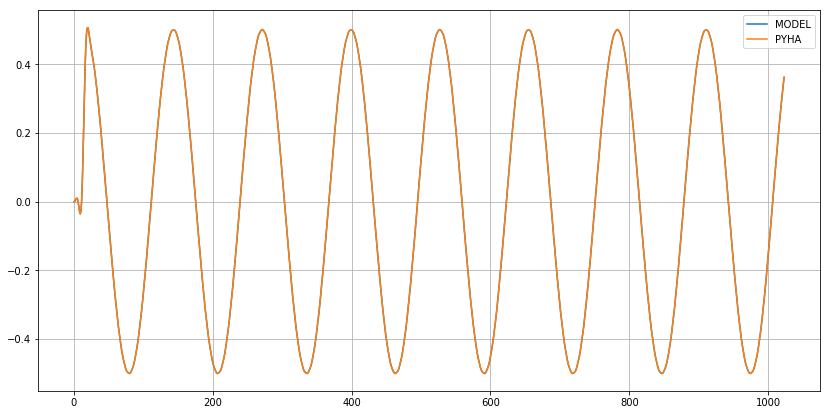

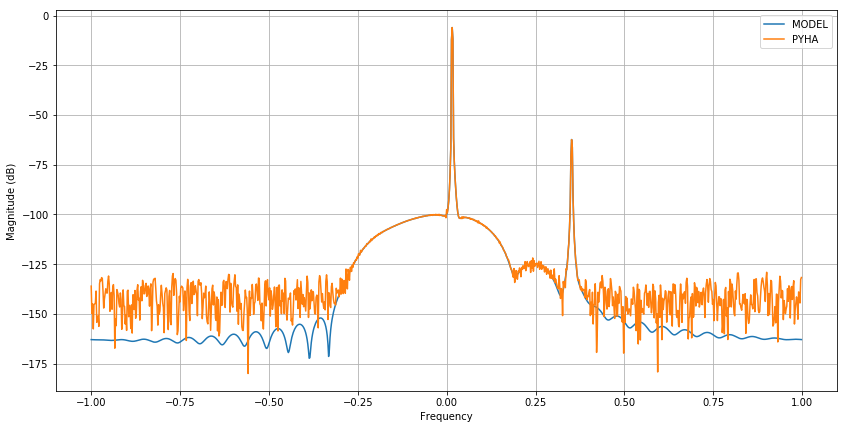

In [9]:
plt.plot(np.array(sims['MODEL']).real, label='MODEL')
plt.plot(np.array(sims['PYHA']).real, label='PYHA')
plt.legend()
plt.grid(True)
plt.show()

plt.magnitude_spectrum(sims['MODEL'], scale='dB', label='MODEL')
plt.magnitude_spectrum(sims['PYHA'], scale='dB', label='PYHA')
plt.legend()
plt.grid(True)
plt.show()